# Etude de la densité locale sous une transition de phase

#### L'idée derrière cette approche est d'observer à une transition liquide-gaz du fluide de Lennard-Jones, via une évolution des maximums de probabilité du nombre d'occupation.

## Importation des librairies et des routines

In [2]:
# Import standard libraries
import numpy as np
from scipy.special import gamma
from scipy import sparse
import matplotlib.pyplot as plt
from matplotlib import animation, cm, colors, rc
import random
import time
from imp import reload
rc('animation', html='html5')

# Import library of our own functions
import MPCMolecularDynamics as MD
reload(MD)
from library1 import *

#Include plots into notebook instead of plotting them in extra window
%matplotlib inline 

print(np.__version__)

1.20.3


## Rappel de la théorie

On trie les particules via une grille, et on compte.

### Test des fonctions

In [4]:
# define system
NParticles=256
sigma = 1

# density
rho = 0.5/sigma**2
LBox = np.power(NParticles/rho,1/2)
print("LBox = ",LBox)

# define initial state
x = MD.RandomPositions(LBox,NParticles)
y = MD.RandomPositions(LBox,NParticles)

LBox =  22.627416997969522


In [37]:
CellOccupancyV1(NParticles,4,x,y,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)

array([12., 15., 18., 15., 14., 21., 16., 13., 17., 14., 16., 21., 10.,
       26., 14., 14.])

### Première boucle sur un ensemble de trajectoires

In [38]:
# define initial state
x = MD.RandomPositions(LBox,NParticles)
y = MD.RandomPositions(LBox,NParticles)

x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])

x_tr_ens = np.array([x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr])

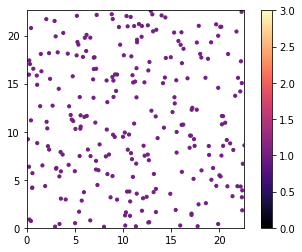

In [39]:
m = np.ones(NParticles)
MD.PlotMDConf(x_tr[-1],y_tr[-1],xBox=(0,LBox),yBox=(0,LBox),xpbc=True,ypbc=True,m=m,c=m)

In [40]:
cOcc = CellOccupancy_vec(4,x,y,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(16,)


array([12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
       18., 21., 14.])

In [41]:
cOcc = CellOccupancy_vec(4,x_tr,y_tr,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(3, 16)


array([[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.]])

In [42]:
cOcc = CellOccupancy_vec(4,x_tr_ens,y_tr_ens,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(2, 3, 16)


array([[[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]],

       [[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]]])

On a integré toutes ces fonctions dans *CellOccupancy*

Marche pour des boîtes assymétriques.

In [43]:
cOcc = CellOccupancy(4,x,y,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(16,)


array([12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
       18., 21., 14.])

In [44]:
cOcc = CellOccupancy(4,x_tr,y_tr,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(3, 16)


array([[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.]])

In [45]:
cOcc = CellOccupancy(4,x_tr_ens,y_tr_ens,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(2, 3, 16)


array([[[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]],

       [[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]]])

## Densité locale pour une trajectoire dans l'espace des phases

In [66]:
# define system
d=2
NParticles=256
kT = 0.5
m = np.ones(NParticles)

# Lennard-Jones
sigma = 1
epsilon = 1
tau = sigma*np.sqrt(m[0]/epsilon) #unit of time
print('tau=',tau)

# choose density
rho = 0.5/sigma**d
print('Densité=', rho, 'sigma**',d)
LBox = np.power(NParticles/rho,1./d)
print("LBox = ",LBox)

# define the length of the trajectory
run_time = 100. * tau

# generate trajectories and measure execution time
initialWallTime = time.perf_counter()

( t_tr, x_tr, y_tr, vx_tr, vy_tr, uPot_tr, uKin_tr, pPot_tr, pKin_tr, pHyper_tr, [t,x,y,vx,vy] 
) = Generate_LJ_NVT_MolecularDynamics_Trajectory(d,m,LBox,kT,run_time)

print("Execution time: ",time.perf_counter() - initialWallTime)

tau= 1.0
Densité= 0.5 sigma** 2
LBox =  22.627416997969522
Execution time:  613.1267462740002


In [67]:
#!! PERIODIC BOUNDARY CONDITIONS
nOcc_tr = CellOccupancy(4,x_tr,y_tr,LBox,LBox,x_pbc=True,y_pbc=True,debug=False)

In [68]:
nOcc_hist, nOcc_bin_edges = np.histogram(nOcc_tr, 101, (-0.5,100.5), normed=None, weights=None, density=True)

Text(0, 0.5, 'p(n)')

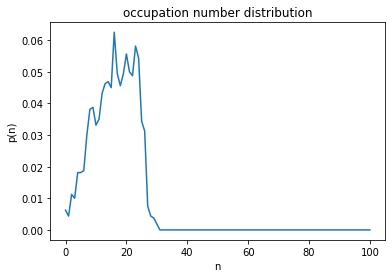

In [69]:
plt.plot(MD.BinCenters(nOcc_bin_edges),nOcc_hist)
plt.title("occupation number distribution")
plt.xlabel("n")
plt.ylabel("p(n)")

In [70]:
np.sum(nOcc_hist)

1.0

La fonction de corrélation nous informe ici qu'il n'y a pas une structure clairement identifiée.

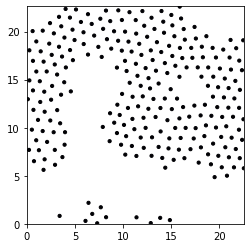

In [71]:
MD.PlotMDConf(x_tr[-1],y_tr[-1],xBox=(0,LBox),yBox=(0,LBox),xpbc=True,ypbc=True,m=m)

## Génération d'un ensemble de trajectoires à $kT$ et $\rho$ fixés

In [3]:
# define system
NParticles=32
d=2
kT = .5
m = np.ones(NParticles)
sigma = 1
epsilon = 1
#unit of time
tau = sigma*np.sqrt(m[0]/epsilon)      

# density
rho = 0.5/sigma**d
LBox = np.power(NParticles/rho,1/2)
print('kT=',kT)
print('rho=',rho)
print("LBox = ",LBox)

# define the length of the trajectory
run_time = 100. * tau

# define number of independent trajectories
NTrajectories = 5
print('Nombre de simulations:', NTrajectories)

# generate trajectories and measure execution time
initialWallTime = time.perf_counter()

(t_tr_ens, x_tr_ens, y_tr_ens, vx_tr_ens, vy_tr_ens,
 uPot_tr_ens, uKin_tr_ens, pPot_tr_ens, pKin_tr_ens, pHyper_tr_ens,
 list_of_starting_configurations
) = Generate_Ensemble_of_LJ_NVT_MolecularDynamics_Trajectories(d,m,LBox,kT,NTrajectories,run_time)

print("Execution time: ",time.perf_counter() - initialWallTime)

kT= 0.5
rho= 0.5
LBox =  8.0
Nombre de simulations: 5
Execution time:  213.56149442500003


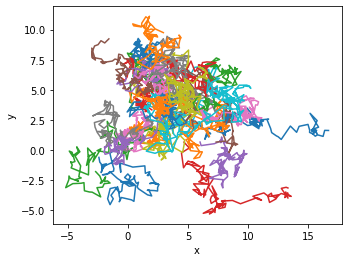

In [4]:
#Tracé de la trajectoire des particules pour 1 simulation, check up
ax = plt.axes()
Traj=1
MD.AddParticleTraces(ax,x_tr_ens[Traj],y_tr_ens[Traj],range(NParticles))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

In [5]:
nOcc_tr = CellOccupancy(4,x_tr_ens,y_tr_ens,LBox,LBox,x_pbc=True,y_pbc=True,debug=False)

In [6]:
nOcc_hist, nOcc_bin_edges = np.histogram(nOcc_tr, 101, (-0.5,100.5), normed=None, weights=None, density=True)

0.34275


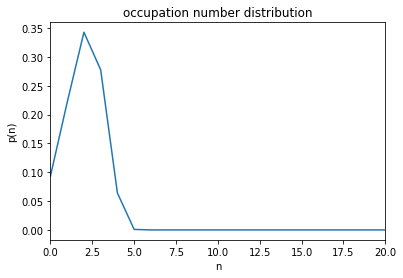

In [9]:
plt.plot(MD.BinCenters(nOcc_bin_edges),nOcc_hist)
plt.title("occupation number distribution")
plt.xlabel("n")
plt.ylabel("p(n)")
plt.xlim(0,20)
print(max(nOcc_hist))

In [8]:
np.sum(nOcc_hist)

1.0

## Balayage en température à $\rho$ fixé.

On regarde maintenant un balayage en température à $\rho$ fixé et on essaye d'observer une transition de phase en observant une brisure dans la distribution des maximums de probabilité du nombre d'occupation.

In [85]:
sigma = 1
d = 2

rho_range=np.array([0.1])/(sigma**d)
kT_range = np.linspace(0.3,1,8)
print(rho_range)
print(kT_range)

[0.1]
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [86]:
#### When in doubt use a small number of particles to speed up the simulations
# In a perfect world (as opposed to an exam), we would generate data for different systems sizes 
# and study finite size effects.

NParticles = 16
m = np.ones(NParticles)
d = 2

# Lennard-Jones
sigma = 1
epsilon = 1
tau = sigma*np.sqrt(m[0]/epsilon) #unit of time
print('tau=',tau)

# Not much fun, if we reduce this even further
NTrajectories = 5
run_time_equilibration = 2
run_time_data_acquisition = 20

print("One sweep over all state points corresponds to ", rho_range.size * kT_range.size * NTrajectories," separate simulations!")

# On my computer each of the for "sweeps" below took 2 minutes. If you are worried about time try first with
# NTrajectories = 1

tau= 1.0
One sweep over all state points corresponds to  40  separate simulations!


In [87]:
# Create empty dictionaries for the data generated by MD simulations at specific state points
t_tr_ens_from_NVT_heating = {}
x_tr_ens_from_NVT_heating = {}
y_tr_ens_from_NVT_heating = {}
vx_tr_ens_from_NVT_heating = {}
vy_tr_ens_from_NVT_heating = {}
uPot_tr_ens_from_NVT_heating = {}
uKin_tr_ens_from_NVT_heating = {}
pPot_tr_ens_from_NVT_heating = {}
pKin_tr_ens_from_NVT_heating = {}
pHyper_tr_ens_from_NVT_heating = {}
list_of_starting_configurations_from_NVT_heating = {}


# generate trajectories and measure execution time
initialWallTime = time.perf_counter()

# sweep over densities
for rho in rho_range:
    
    # re-initialize starting configurations
    list_of_starting_configurations=[]
    for n in range(NTrajectories): 
            list_of_starting_configurations.append([])    
    

    # sweep over temperatures
    for kT in kT_range:
        i=0
        print("rho = ",rho,", kT = ",kT)
        
        # Box size
        LBox = np.power(NParticles/rho,1./d)


        # Equilibrate
        # ... reset velocities more often and hope for the best
        (t_tr_ens, x_tr_ens, y_tr_ens, vx_tr_ens, vy_tr_ens,
         uPot_tr_ens, uKin_tr_ens, pPot_tr_ens, pKin_tr_ens, pHyper_tr_ens,
         list_of_starting_configurations
        ) = Generate_Ensemble_of_LJ_NVT_MolecularDynamics_Trajectories(d,m,LBox,kT,NTrajectories,
                                                                       run_time_equilibration,
                                                                       list_of_starting_configurations=list_of_starting_configurations,
                                                                       number_of_time_steps_between_velocity_resets=10)

        key = (NParticles,str(round(rho,3)),str(round(kT,2)))
        # using floats as key can lead to difficulties, because of their inexact representation
        print('key=',key)
                # Generate data
        run_time = 50. *tau
        (t_tr_ens_from_NVT_heating[key], 
         x_tr_ens_from_NVT_heating[key], 
         y_tr_ens_from_NVT_heating[key], 
         vx_tr_ens_from_NVT_heating[key], 
         vy_tr_ens_from_NVT_heating[key],
         uPot_tr_ens_from_NVT_heating[key], 
         uKin_tr_ens_from_NVT_heating[key], 
         pPot_tr_ens_from_NVT_heating[key], 
         pKin_tr_ens_from_NVT_heating[key],
         pHyper_tr_ens_from_NVT_heating[key],
         list_of_starting_configurations_from_NVT_heating[key]
        ) = Generate_Ensemble_of_LJ_NVT_MolecularDynamics_Trajectories(d,m,LBox,kT,NTrajectories,
                                                                       run_time_data_acquisition,
                                                                       list_of_starting_configurations=list_of_starting_configurations)

print("Execution time: ",time.perf_counter() - initialWallTime)

rho =  0.1 , kT =  0.3
key= (16, '0.1', '0.3')
rho =  0.1 , kT =  0.39999999999999997
key= (16, '0.1', '0.4')
rho =  0.1 , kT =  0.5
key= (16, '0.1', '0.5')
rho =  0.1 , kT =  0.6
key= (16, '0.1', '0.6')
rho =  0.1 , kT =  0.7
key= (16, '0.1', '0.7')
rho =  0.1 , kT =  0.7999999999999999
key= (16, '0.1', '0.8')
rho =  0.1 , kT =  0.8999999999999999
key= (16, '0.1', '0.9')
rho =  0.1 , kT =  1.0
key= (16, '0.1', '1.0')
Execution time:  76.91147917299531


In [88]:
Occ_from_NVT_heating=[]

for i in range(len(kT_range)):
    
    key=((NParticles,str(round(rho,3)),str(round(kT_range[i],2))))
    nOcc_tr = CellOccupancy(4,x_tr_ens_from_NVT_heating[key],y_tr_ens_from_NVT_heating[key],LBox,LBox,x_pbc=True,y_pbc=True,debug=False)
    nOcc_hist, nOcc_bin_edges = np.histogram(nOcc_tr, 101, (-0.5,100.5), normed=None, weights=None, density=True)
    occ_Ntraj_fixedkT = nOcc_hist, nOcc_bin_edges
    #print(occ_Ntraj_fixedkT)
    Occ_from_NVT_heating.append(occ_Ntraj_fixedkT)
    


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlim'

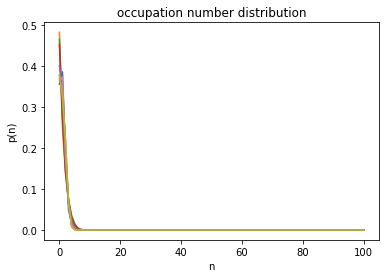

In [102]:
for i in range(len(Occ_from_NVT_heating)):
    plt.plot(MD.BinCenters(Occ_from_NVT_heating[i][1]),Occ_from_NVT_heating[i][0],label='kT={}'.format(round(kT_range[i],2)))


plt.plot(MD.BinCenters(nOcc_bin_edges),nOcc_hist)
plt.title("occupation number distribution")
plt.xlabel("n")
plt.ylabel("p(n)")
#Problème avec xlim ici au CBP; nous n'avons pas pu afficher clairement les les distributions
#xmin = 0
#xmax = 6
#plt.xlim()
plt.legend()

Transition à $kT = 0.6$ (on passe d'un max à N=0 à un max à N=1) (non observé ici à cause du graphe trop large).

On trace alors le maximum en fonction de kT. Il semblerait (en oblitérant le premier gap) que la transition se situe vers $kT = 0.6$.

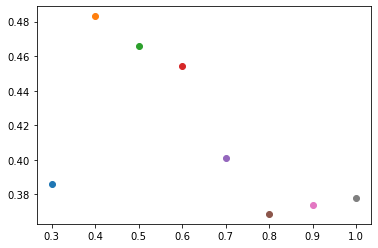

In [90]:
proba=[]
nombre=[]
for elem in Occ_from_NVT_heating:
    proba.append(elem[0])
    nombre.append(elem[1]+1/2)

max_proba=[]
for elem in proba:
    max_proba.append(max(elem))

for i in range(len(kT_range)):
    plt.scatter(kT_range[i],max_proba[i],label='kT={}'.format(kT_range[i]))

#plt.legend()

## Implémentation pour différents $\rho$

Il suffit de réutiliser tout ce qu'on a fait jusqu'à présent, les insérer dans une boucle et de balayer les $\rho$. On affiche ensuite, pour chaque $\rho$, le graphe des maximums de probabilité du nombre d'occupation en fonction de la température. On espère observer une évolution dans le comportement des maximums.

In [2]:
rho_range=np.array(np.linspace(0.05,0.8,10))
kT_range = np.array(np.linspace(0.3,1,15))
print('rho=',rho_range)
print('kT=',kT_range)

rho= [0.05       0.13333333 0.21666667 0.3        0.38333333 0.46666667
 0.55       0.63333333 0.71666667 0.8       ]
kT= [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95
 1.  ]


In [3]:
#### When in doubt use a small number of particles to speed up the simulations
# In a perfect world (as opposed to an exam), we would generate data for different systems sizes 
# and study finite size effects.

NParticles = 64
m = np.ones(NParticles)
d = 2

# Lennard-Jones
sigma = 1
epsilon = 1
tau = sigma*np.sqrt(m[0]/epsilon) #unit of time
print('tau=',tau)

# Not much fun, if we reduce this even further
NTrajectories = 10
run_time_equilibration = 2
run_time_data_acquisition = 20

print("One sweep over all state points corresponds to ", rho_range.size * kT_range.size * NTrajectories," separate simulations!")

# On my computer each of the for "sweeps" below took 2 minutes. If you are worried about time try first with
# NTrajectories = 1

tau= 1.0
One sweep over all state points corresponds to  1500  separate simulations!


In [4]:
# Create empty dictionaries for the data generated by MD simulations at specific state points
t_tr_ens_from_NVT_heating = {}
x_tr_ens_from_NVT_heating = {}
y_tr_ens_from_NVT_heating = {}
vx_tr_ens_from_NVT_heating = {}
vy_tr_ens_from_NVT_heating = {}
uPot_tr_ens_from_NVT_heating = {}
uKin_tr_ens_from_NVT_heating = {}
pPot_tr_ens_from_NVT_heating = {}
pKin_tr_ens_from_NVT_heating = {}
pHyper_tr_ens_from_NVT_heating = {}
list_of_starting_configurations_from_NVT_heating = {}


# generate trajectories and measure execution time
initialWallTime = time.perf_counter()

# sweep over densities
for rho in rho_range:
    
    # re-initialize starting configurations
    list_of_starting_configurations=[]
    for n in range(NTrajectories): 
            list_of_starting_configurations.append([])    
    

    # sweep over temperatures
    for kT in kT_range:
        i=0
        print("rho = ",rho,", kT = ",kT)
        
        # Box size
        LBox = np.power(NParticles/rho,1./d)


        # Equilibrate
        # ... reset velocities more often and hope for the best
        (t_tr_ens, x_tr_ens, y_tr_ens, vx_tr_ens, vy_tr_ens,
         uPot_tr_ens, uKin_tr_ens, pPot_tr_ens, pKin_tr_ens, pHyper_tr_ens,
         list_of_starting_configurations
        ) = Generate_Ensemble_of_LJ_NVT_MolecularDynamics_Trajectories(d,m,LBox,kT,NTrajectories,
                                                                       run_time_equilibration,
                                                                       list_of_starting_configurations=list_of_starting_configurations,
                                                                       number_of_time_steps_between_velocity_resets=10)

        key = (NParticles,str(round(rho,3)),str(round(kT,2)))
        # using floats as key can lead to difficulties, because of their inexact representation
        print('key=',key)
                # Generate data
        run_time = 50. *tau
        (t_tr_ens_from_NVT_heating[key], 
         x_tr_ens_from_NVT_heating[key], 
         y_tr_ens_from_NVT_heating[key], 
         vx_tr_ens_from_NVT_heating[key], 
         vy_tr_ens_from_NVT_heating[key],
         uPot_tr_ens_from_NVT_heating[key], 
         uKin_tr_ens_from_NVT_heating[key], 
         pPot_tr_ens_from_NVT_heating[key], 
         pKin_tr_ens_from_NVT_heating[key],
         pHyper_tr_ens_from_NVT_heating[key],
         list_of_starting_configurations_from_NVT_heating[key]
        ) = Generate_Ensemble_of_LJ_NVT_MolecularDynamics_Trajectories(d,m,LBox,kT,NTrajectories,
                                                                       run_time_data_acquisition,
                                                                       list_of_starting_configurations=list_of_starting_configurations)

print("Execution time: ",time.perf_counter() - initialWallTime)

rho =  0.05 , kT =  0.3
key= (64, '0.05', '0.3')
rho =  0.05 , kT =  0.35
key= (64, '0.05', '0.35')
rho =  0.05 , kT =  0.39999999999999997
key= (64, '0.05', '0.4')
rho =  0.05 , kT =  0.44999999999999996
key= (64, '0.05', '0.45')
rho =  0.05 , kT =  0.5
key= (64, '0.05', '0.5')
rho =  0.05 , kT =  0.5499999999999999
key= (64, '0.05', '0.55')
rho =  0.05 , kT =  0.6
key= (64, '0.05', '0.6')
rho =  0.05 , kT =  0.6499999999999999
key= (64, '0.05', '0.65')
rho =  0.05 , kT =  0.7
key= (64, '0.05', '0.7')
rho =  0.05 , kT =  0.75
key= (64, '0.05', '0.75')
rho =  0.05 , kT =  0.7999999999999999
key= (64, '0.05', '0.8')
rho =  0.05 , kT =  0.8499999999999999
key= (64, '0.05', '0.85')
rho =  0.05 , kT =  0.8999999999999999
key= (64, '0.05', '0.9')
rho =  0.05 , kT =  0.95
key= (64, '0.05', '0.95')
rho =  0.05 , kT =  1.0
key= (64, '0.05', '1.0')
rho =  0.13333333333333333 , kT =  0.3
key= (64, '0.133', '0.3')
rho =  0.13333333333333333 , kT =  0.35
key= (64, '0.133', '0.35')
rho =  0.1333333

In [5]:
Occ_from_NVT_heating_rho=[]
for i in range (len(rho_range)):
    Occ_from_NVT_heating_kT=[]
    for j in range(len(kT_range)):
        
        key=((NParticles,str(round(rho_range[i],3)),str(round(kT_range[j],2))))
        print(key)
        nOcc_tr = CellOccupancy(4,x_tr_ens_from_NVT_heating[key],y_tr_ens_from_NVT_heating[key],LBox,LBox,x_pbc=True,y_pbc=True,debug=False)
        nOcc_hist, nOcc_bin_edges = np.histogram(nOcc_tr, 101, (-0.5,100.5), normed=None, weights=None, density=True)
        occ_Ntraj_fixedkT = nOcc_hist, nOcc_bin_edges
        #print(occ_Ntraj_fixedkT)
        Occ_from_NVT_heating_kT.append(occ_Ntraj_fixedkT)
    Occ_from_NVT_heating_rho.append(Occ_from_NVT_heating_kT)    

Occ_from_NVT_heating_rho[0]


(64, '0.05', '0.3')
(64, '0.05', '0.35')
(64, '0.05', '0.4')
(64, '0.05', '0.45')
(64, '0.05', '0.5')
(64, '0.05', '0.55')
(64, '0.05', '0.6')
(64, '0.05', '0.65')
(64, '0.05', '0.7')
(64, '0.05', '0.75')
(64, '0.05', '0.8')
(64, '0.05', '0.85')
(64, '0.05', '0.9')
(64, '0.05', '0.95')
(64, '0.05', '1.0')
(64, '0.133', '0.3')
(64, '0.133', '0.35')
(64, '0.133', '0.4')
(64, '0.133', '0.45')
(64, '0.133', '0.5')
(64, '0.133', '0.55')
(64, '0.133', '0.6')
(64, '0.133', '0.65')
(64, '0.133', '0.7')
(64, '0.133', '0.75')
(64, '0.133', '0.8')
(64, '0.133', '0.85')
(64, '0.133', '0.9')
(64, '0.133', '0.95')
(64, '0.133', '1.0')
(64, '0.217', '0.3')
(64, '0.217', '0.35')
(64, '0.217', '0.4')
(64, '0.217', '0.45')
(64, '0.217', '0.5')
(64, '0.217', '0.55')
(64, '0.217', '0.6')
(64, '0.217', '0.65')
(64, '0.217', '0.7')
(64, '0.217', '0.75')
(64, '0.217', '0.8')
(64, '0.217', '0.85')
(64, '0.217', '0.9')
(64, '0.217', '0.95')
(64, '0.217', '1.0')
(64, '0.3', '0.3')
(64, '0.3', '0.35')
(64, '0.3'

[(array([0.06125  , 0.0878125, 0.1340625, 0.1715625, 0.179375 , 0.140625 ,
         0.0896875, 0.056875 , 0.03375  , 0.015625 , 0.0096875, 0.0046875,
         0.0034375, 0.0015625, 0.0028125, 0.0025   , 0.0046875, 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.   

### Evolution du comportement du maximum de la densité de probabilité avec $\rho$

L'évolution du maximum de $p(n)$ pourrait nous renseigner sur la transition de phase ou non. C'est ce que nous avons voulu vérifier par la suite. Pour un $\rho$ fixé, on regarde l'évolution du maximum de $p(n)$ avec la température. Les cellules qui suivent permettent de déterminer le maximum de la densité de probabilité pour les températures balayées.

In [8]:
print(len(Occ_from_NVT_heating_rho))
print(len(rho_range))

10
10


In [9]:
proba_rho_fix=[]
for elem in Occ_from_NVT_heating_rho:
    proba_kT=[]
    for i in range(len(kT_range)):
        proba_kT.append((kT_range[i],max(elem[i][0])))
    proba_rho_fix.append(proba_kT)
    

In [10]:
proba_rho_fix[0]

[(0.3, 0.179375),
 (0.35, 0.1809375),
 (0.39999999999999997, 0.1709375),
 (0.44999999999999996, 0.1865625),
 (0.5, 0.20875),
 (0.5499999999999999, 0.2121875),
 (0.6, 0.189375),
 (0.6499999999999999, 0.209375),
 (0.7, 0.20125),
 (0.75, 0.20875),
 (0.7999999999999999, 0.200625),
 (0.8499999999999999, 0.2025),
 (0.8999999999999999, 0.205625),
 (0.95, 0.2134375),
 (1.0, 0.205625)]

On affiche ensuite sur des graphes séparés à $\rho$ fixés.

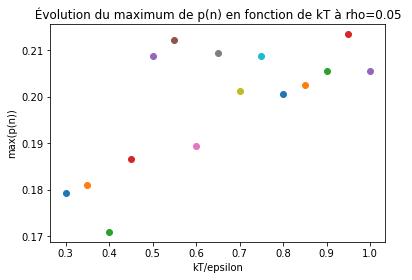

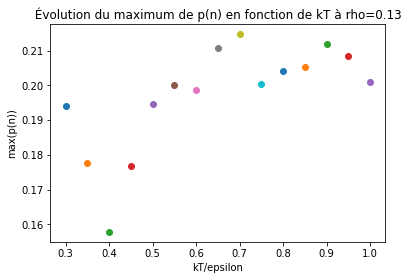

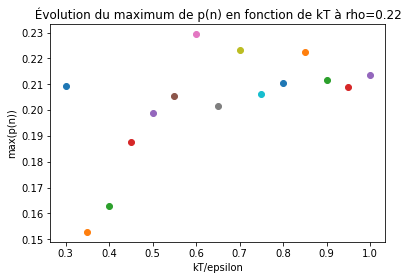

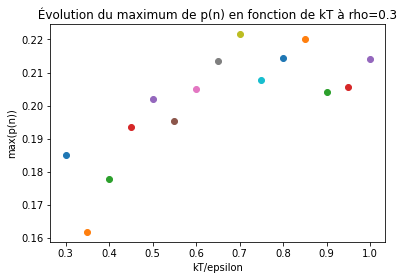

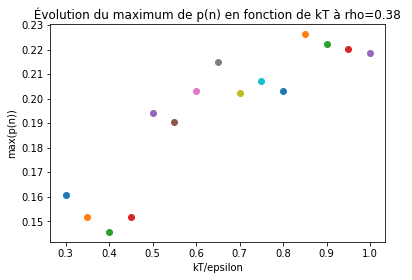

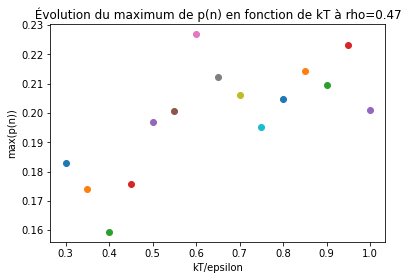

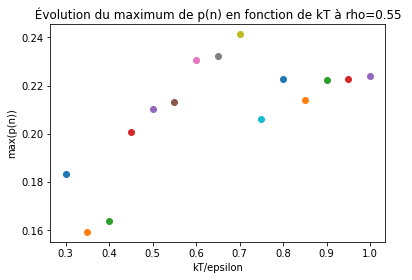

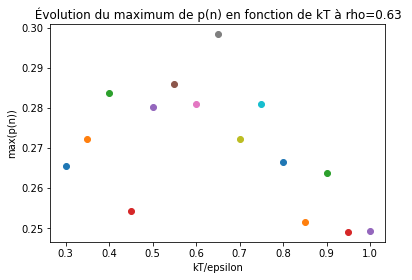

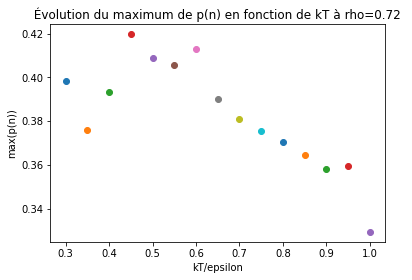

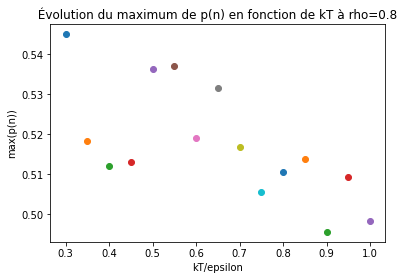

In [13]:
for i in range(len(proba_rho_fix)):
    for elem in proba_rho_fix[i]:
        plt.scatter(elem[0],elem[1])
    plt.ylabel("max(p(n))")
    plt.xlabel('kT/epsilon')
    plt.title(' Évolution du maximum de p(n) en fonction de kT à rho={} '.format(round(rho_range[i],2)))
    plt.show()

On remarque qu'à partir de $\rho$ =0.63,le maximum de $p(n)$ n'augmente plus de manière monotone mais semble passer par un maximum avant de diminuer avec la température. Ce changement de comportement pourrait indiquer la présence d'une transition de phase. En effet, typiquement, pour $\rho/\sigma^2=0.63$, le maximum se situe autour de $kT/\varepsilon=0.6$. On peut aussi comparer nos maximums de probabilité pour $\rho=0.30$ avec ceux observés par Rovere et al. (1990).

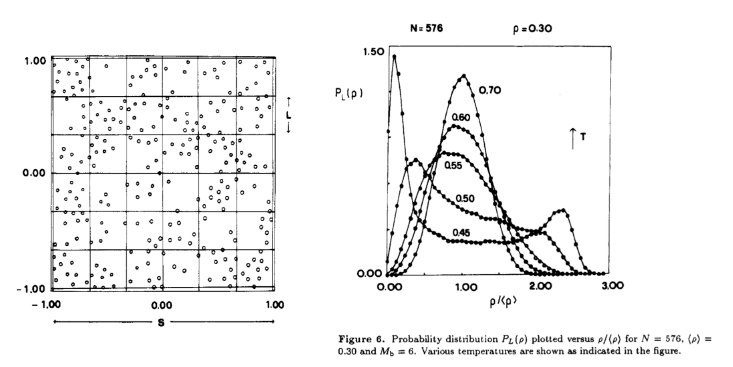

Pour conclure, on pourrait relier main_densite avec main_compressibilite en reliant les fluctuations de pression aux variations du nombre d'occupation, mais par manque de temps, nous n'avons pas pu observer le phénomène. Par ailleurs, on peut imaginer reproduire cette expérience avec deux types de particules et observer à nouveau les évolutions des maximum de probabilité.